In [1]:
import numpy as np

In [23]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, no_bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val):
        """train"""
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}th iteration loss{}'.format(i,loss))

    def _gradient_descent(self, X, y):
        """Θ update (steepest descent method)"""
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self, y):
        """sigmoidfunction"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        """Hypothetical function"""
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        """predict"""
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        """probabilistic prediction """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        """cross entropy error function"""
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [25]:
slr = ScratchLogisticRegression(num_iter=10, lr=0.01, no_bias=True, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0th iteration loss0.6931472329697357
1th iteration loss0.6850300023117688
2th iteration loss0.6778566413037203
3th iteration loss0.6714082415067818
4th iteration loss0.6655184896481339
5th iteration loss0.6600612635121155
6th iteration loss0.6549409966390674
7th iteration loss0.6500852800260042
8th iteration loss0.6454392241644843
9th iteration loss0.6409611829877158


In [26]:
slr.predict(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

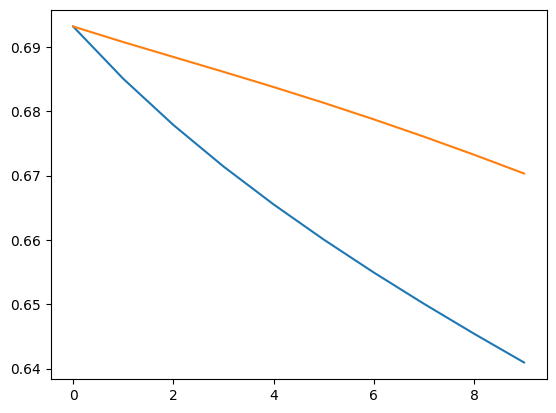

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

In [29]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,no_bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

0th iteration loss0.6931471806014049
1th iteration loss0.693080849446744
2th iteration loss0.6930145323702167
3th iteration loss0.6929482293044839
4th iteration loss0.6928819401835433
5th iteration loss0.6928156649427045
6th iteration loss0.6927494035185607
7th iteration loss0.6926831558489621
8th iteration loss0.6926169218729924
9th iteration loss0.6925507015309403
10th iteration loss0.6924844947642776
11th iteration loss0.6924183015156353
12th iteration loss0.692352121728777
13th iteration loss0.692285955348579
14th iteration loss0.6922198023210052
15th iteration loss0.6921536625930883
16th iteration loss0.6920875361129023
17th iteration loss0.6920214228295475
18th iteration loss0.6919553226931248
19th iteration loss0.6918892356547185
20th iteration loss0.6918231616663743
21th iteration loss0.6917571006810801
22th iteration loss0.6916910526527473
23th iteration loss0.6916250175361922
24th iteration loss0.6915589952871156
25th iteration loss0.691492985862087
26th iteration loss0.69142

In [32]:
from matplotlib.colors import ListedColormap

def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

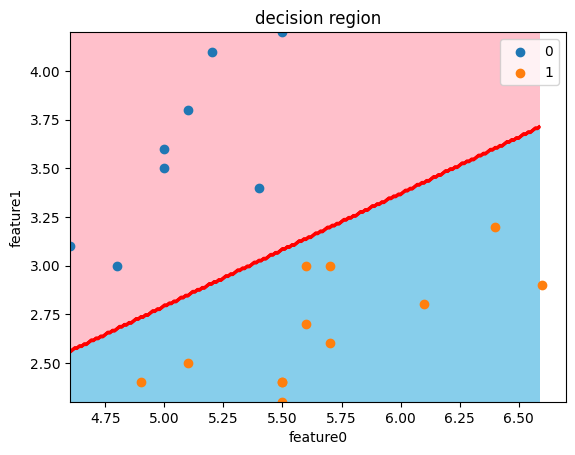

In [33]:

decision_region(X_test,y_test, slr)

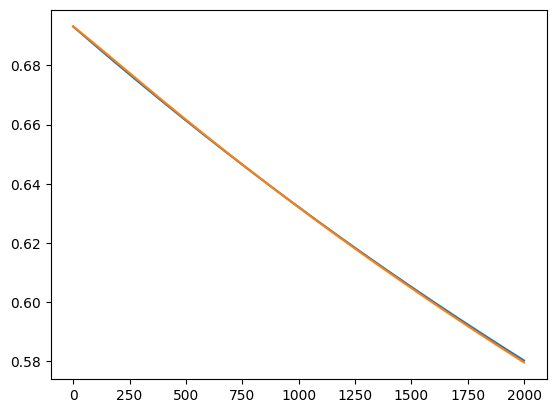

In [34]:
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()